# 6.5 Machine learning clustering

In [1]:
# Importing the libraries that are going to be used and importing the DF
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans
import pylab as pl 

I had to change my data as the Tech data sales were not creating an elbow and wasn't clustering at all 

In [2]:
path = r'C:\Users\Hello\Desktop\Tech sales data\02 Data\Prepared Data'

In [3]:
df = pd.read_csv(os.path.join(path,'IRIS.csv'))

In [4]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [5]:
# As we can see, there is plenty of categorical data, so we need to keep only the numerical one
df1 = df.drop(columns =['species'])

In [6]:
df1

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


### 6.5.3 Elbow technique 

In [7]:
# Stating by defining the range of the cluster
num_cl = range(1, 20) 
# Then, defining the k-means cluster in the above range.
kmeans = [KMeans(n_clusters=i) for i in num_cl] 

In [8]:
# Now, create a score for each of the ranges created..
score = [kmeans[i].fit(df1).score(df1) for i in range(len(kmeans))] 

score

C:\Users\Hello\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[-680.8244,
 -152.36870647733903,
 -78.94084142614601,
 -57.31787321428571,
 -46.53558205128205,
 -38.95701115711985,
 -34.31116758986839,
 -30.00336433172302,
 -27.99467325428195,
 -26.469412638831763,
 -24.281351370851368,
 -23.21202380952381,
 -21.109391774891776,
 -19.672770562770562,
 -19.42368362193362,
 -18.008273809523807,
 -17.357439560439563,
 -16.108674339549342,
 -15.76364826839827]

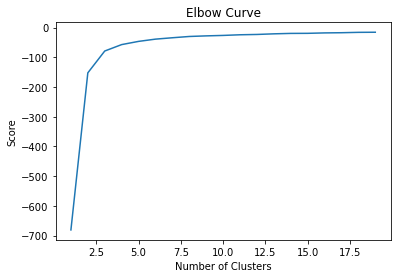

In [9]:
# And finally, create the elbow graph
pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

### 6.5.4 Number of clusters

As we can notice, we are getting a value of between 2 and 4 for the breaking point of the curve, meaning that we are going to have to use one of those values.
I tried creating 3 clusters and 4 clusters but found that 4 gave better results

### 6.5.5 K-means clustering

In [10]:
# First, create the object based on the n° of clusters
kmeans = KMeans(n_clusters = 4) 

In [11]:
# Then fit the K-mean into the DF
kmeans.fit(df1)

KMeans(n_clusters=4)

### 6.5.6 Attaching to the DF

In [12]:
df1['clusters'] = kmeans.fit_predict(df1)

In [13]:
df1.head()

,sepal_length,sepal_width,petal_length,petal_width,clusters
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


In [14]:
# Verify if the clusters we correctly assigned with a general view
df1['clusters'].value_counts()

1    50
0    40
2    32
3    28
Name: clusters, dtype: int64

### 6.5.7 Ploting

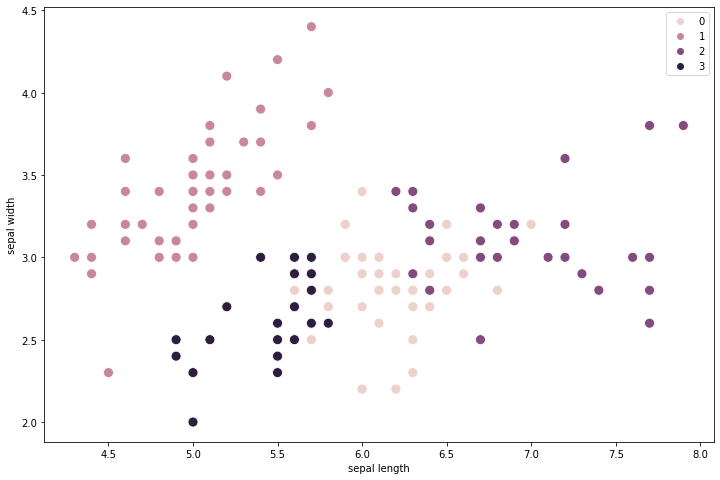

In [15]:
# And now plot it! First Mileage and price compared

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df1['sepal_length'], y=df1['sepal_width'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('sepal length') # Label x-axis.
plt.ylabel('sepal width') # Label y-axis.
plt.show()

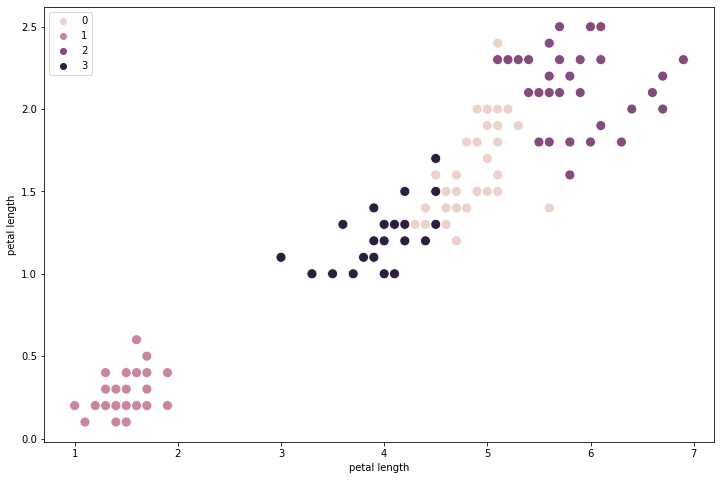

In [16]:
# Then, the car year and price.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df1['petal_length'], y=df1['petal_width'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('petal length') # Label x-axis.
plt.ylabel('petal length') # Label y-axis.
plt.show()

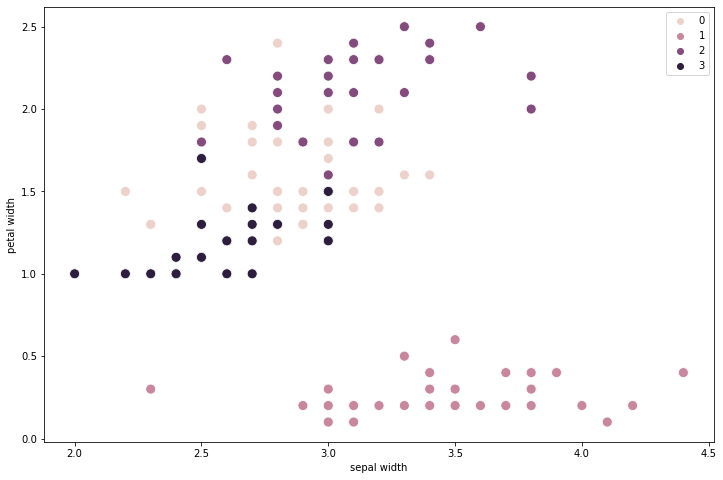

In [17]:
# Lastly the year and the mileage.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df1['sepal_width'], y=df1['petal_width'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('sepal width') # Label x-axis.
plt.ylabel('petal width') # Label y-axis.
plt.show()

### 6.5.8 Plot analysis 

All the clusters made sense on their own.

**Sepal length and width**: The first cluster plot shows that when an Iris starts to grow the Sepal width starts of wide for which I will make the assumption that it needs the width to push through the soil then as it grows the Sepal width reduces this allows it to put all its enregy into growing up towards the sun then once it has reached its full length it then starts to thicken.

**Petal length and width**: This shows that throught the growing cycle of the Iris the shape of the petal doesn't change it just gets bigger as it grows.

**Sepal width and Petal width**: This cluster made sense as well, showing that the Iris has a limited amount of energy and it will either use the energy to make the Sepal thicker or the petals bigger.

It would be good to compare this to average wind speed where the Iris is growing which would give an indication of if the plant needs strngth or can use its resurses to make it taller with bigger flowers

### 6.5.9 Grouping

In [18]:
df1.groupby('clusters').agg({'sepal_length':['mean', 'median'], 
                         'sepal_width':['mean', 'median'],
                         'petal_width':['mean', 'median'],
                         'petal_length':['mean', 'median']})


sepal_length        sepal_width        petal_width         \
                 mean median        mean median        mean median   
clusters                                                             
0            6.252500   6.25    2.855000   2.90    1.625000   1.50   
1            5.006000   5.00    3.418000   3.40    0.244000   0.20   
2            6.912500   6.80    3.100000   3.05    2.131250   2.15   
3            5.532143   5.60    2.635714   2.65    1.228571   1.25   

         petal_length         
                 mean median  
clusters                      
0            4.815000   4.80  
1            1.464000   1.50  
2            5.846875   5.75  
3            3.960714   4.00

### 6.5.10 Grouping analysis

Cluster 3 has the largest plants in it followed by cluster 0, then 2 and lastly cluster 1 which has the smallest plants

All this information can be compared in the future with nominal data, to better predict the possible crop growth .